# Customer Churn Analysis





![](https://www.touchpoint.com/wp-content/uploads/2023/02/5.-Customer-churn-article.png )


### **Understanding Customer Churn & Its Impact**  

#### **What is Customer Churn?**  
Customer churn refers to the percentage of customers who stop using a company's service over a specific period. It happens when customers cancel their subscriptions or stop paying for a service.  

For example, if a telecom company starts the month with **100 customers** and loses **10** by the end of the month, the churn rate is **10%**.  

#### **Why Does Churn Matter?**  
- **High churn makes growth difficult** – If customers keep leaving, the company must work harder to attract new ones just to maintain its revenue.  
- **Retaining customers is cheaper** – Acquiring a new customer costs more than keeping an existing one.  
- **Churn is normal, but should be minimized** – No business can keep every customer forever, but the goal is to reduce churn as much as possible.  

#### **Churn in the Telecom Industry**  
- Telecom customers have **many options** and can easily switch providers.  
- The **annual churn rate** in telecom is **15-25%**, making it a major challenge.  
- Companies cannot afford to give personal attention to every customer. Instead, they **predict churn** and focus retention efforts on customers most likely to leave.  

#### **Why Predicting Churn is Important**  
If a company can **identify "high-risk" customers before they leave**, it can take action to retain them. This helps:  
✅ Reduce lost revenue  
✅ Increase customer loyalty  
✅ Maintain steady business growth  

By analyzing customer data, we can **build a model** to predict who is likely to churn and take steps to prevent it.

### **Customer Data Dictionary (Simplified Explanation)**  

This data describes customers of a telecom company and their subscription details. Each customer has a unique ID and various attributes related to their services, demographics, and billing.  

---

### **Basic Customer Info:**  
1. **CustomerID** – A unique number assigned to each customer.  
2. **Gender** – The customer’s gender (Male or Female).  
3. **Age** – The customer's age at the end of the quarter.  
4. **Senior Citizen** – Whether the customer is 65 or older (Yes or No).  
5. **Married (Partner)** – Whether the customer is married (Yes or No).  
6. **Dependents** – Whether the customer has children or others living with them (Yes or No).  
7. **Number of Dependents** – How many dependents the customer has.  

---

### **Phone & Internet Services:**  
8. **Phone Service** – Whether the customer has a home phone service (Yes or No).  
9. **Multiple Lines** – Whether the customer has more than one phone line (Yes or No).  
10. **Internet Service** – The type of internet the customer has (DSL or Fiber Optic).  
11. **Online Security** – Whether the customer has an extra security service for internet protection (Yes or No).  
12. **Online Backup** – Whether the customer has an extra service to back up their online data (Yes or No).  
13. **Device Protection Plan** – Whether the customer has a protection plan for their internet equipment (Yes or No).  
14. **Premium Tech Support** – Whether the customer pays for priority technical support with shorter wait times (Yes or No).  
15. **Streaming TV** – Whether the customer streams TV using the company’s internet (Yes or No).  
16. **Streaming Movies** – Whether the customer streams movies using the company’s internet (Yes or No).  

---

### **Billing & Payment Details:**  
17. **Contract** – The type of contract the customer has (Month-to-Month, One Year, Two Year).  
18. **Paperless Billing** – Whether the customer receives their bill online instead of by mail (Yes or No).  
19. **Payment Method** – How the customer pays their bill (Bank Withdrawal, Credit Card, or Mailed Check).  
20. **Monthly Charge** – The amount the customer is charged per month.  
21. **Total Charges** – The total amount the customer has paid to date.  

---

### **Customer Relationship with the Company:**  
22. **Tenure** – How many months the customer has been with the company.  
23. **Churn** – Whether the customer left the company this quarter (Yes = left, No = stayed).  

This data helps understand customer behavior, service usage, and reasons why customers may choose to stay or leave.

## A) Dataset

Lets start by importing libraries that we shall need

In [1]:
#EDA Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import rcParams

In [56]:
#Model Building Libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


Loading the dataset

In [3]:
data=pd.read_csv('D:\\!DOWNLOAD\\Telco-Customer-Churn.csv')

Checking the head and attributes of the dataset

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.shape

(7043, 21)

In [6]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000




1. 75% of customers have a tenure of under 55 months.  
2. The average tenure stands at approximately 32 months.  
3. Monthly charges average around 64.76 USD, with a quarter of customers paying more than $89.85.


In [58]:
#Parameters for plots
rcParams['figure.figsize'] = 8, 6
sns.set_style('darkgrid')
rcParams['axes.titlepad'] = 15
a = ["#145277", "#83d0cb"]  
sns.set_palette(a)

Text(0.5, 1.0, 'No of Churned Customers')

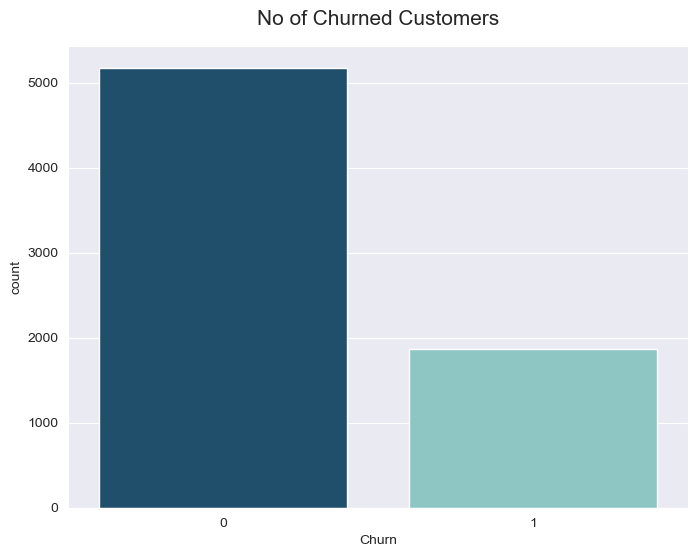

In [57]:
sns.countplot(x=data['Churn'])
plt.title('No of Churned Customers',fontsize=15)

In [60]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

As the distribution of data is not around 50:50 we can say that it is an 'Imbalanced Dataset'

Now lets check if any missing values exist in our dataset

In [61]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


At first glance, it appears that there are no missing values. However, there's a twist!  

The majority of the columns are of the object data type. To accurately identify any null values, these columns need to be converted into either float or integer data types. This can be done using the `to_numeric` method.

In [62]:
df= data.copy()
df['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce') #coerce puts NaN values if there are any parsing errors
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [63]:
df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


As we can see from the above dataframe the customers who have tenure equal to 0 are the ones with blank values in the TotalCharges column. Lets quickly check the dataframe where the tenure is 0

In [64]:
df[df['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0




The matching dataframes indicate that the missing values stem from the customers being new and having yet to make any payments to the company. Consequently, none of these customers have churned thus far.  

Given that these records constitute a minimal percentage of the dataset (approximately 0.156%), dropping them is a reasonable step, as their exclusion is unlikely to significantly affect the overall analysis.

In [65]:
#Dropping the null values
df.dropna(inplace=True)

In [66]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [68]:
df1=df.copy()

df1.drop(['customerID'],axis=1,inplace=True)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Tenure is a specific number and to visualize them would be difficult. Hence we will divide them into bins and assign them into groups. For e.g. tenure < 12 months then assign a group of 1-12 months as 0-1 years, for 13-24 assign group as between 1-2 years and so on...




In [69]:
df['tenure'].max() #The max tenure is 72 months or 6 years

72

In [70]:
# Group the tenures in bins of 12 months
labels = ["{0} - {1}".format(i,i+11) for i in range (1,72,12)]
df['tenure_group'] = pd.cut(df['tenure'], range(1,80,12), right=False, labels=labels)

In [71]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

<Axes: xlabel='tenure_group', ylabel='count'>

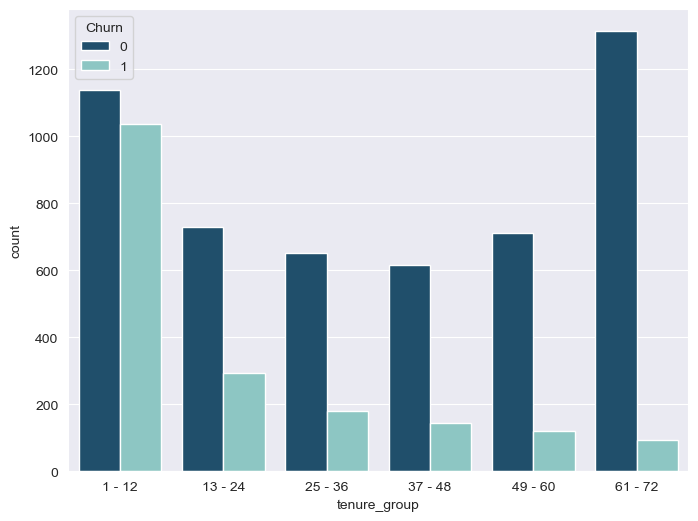

In [72]:
sns.countplot(x=df['tenure_group'],hue='Churn',data=df)

We can notice that customers who have tenure less than a year are the ones who are most likely to churn whereas the clients who have been with the company the longest are very less likely to churn. Also the number of customers with a monthly tenure is higher than others.

Now, lets remove the tenure column now as we have already transformed it into tenure_group

Lets drop the tenure and customerID columns as it is not of much use for data analysis and model training

In [73]:
df.drop(['customerID','tenure'],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


## B) Exploratory Data Analysis

### Univariate Analysis

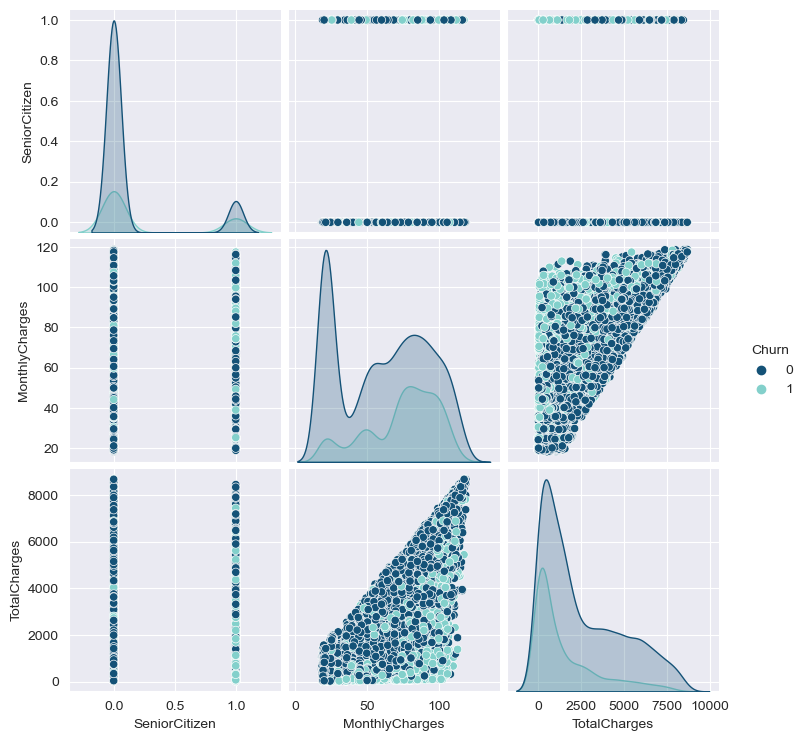

In [74]:
sns.pairplot(df,hue='Churn')

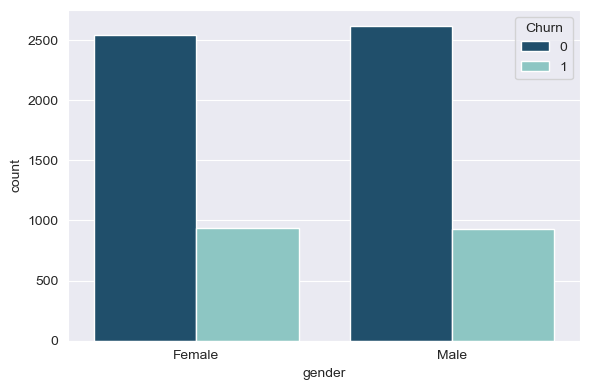

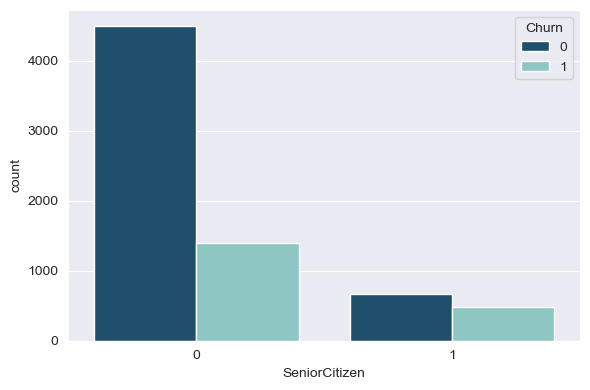

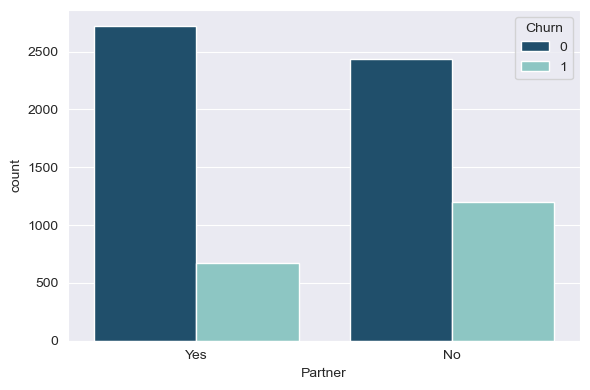

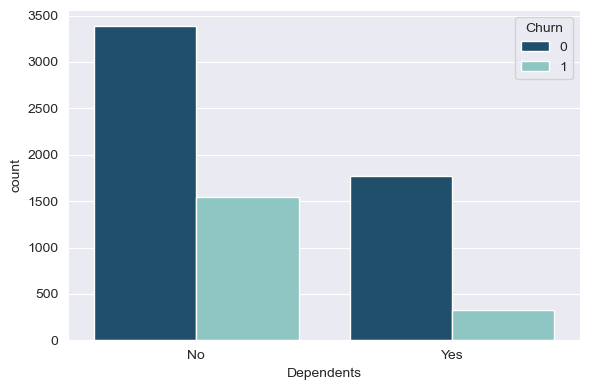

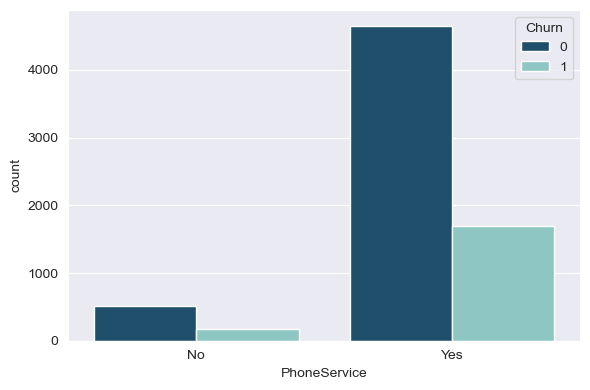

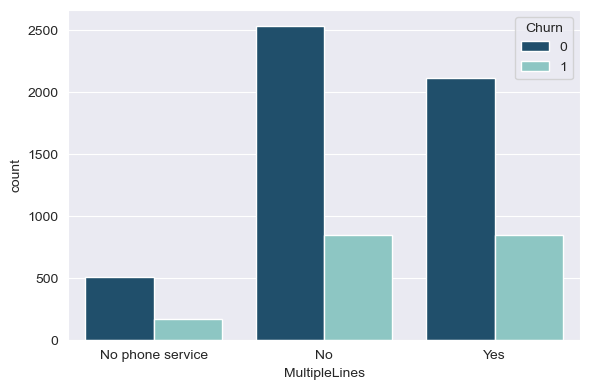

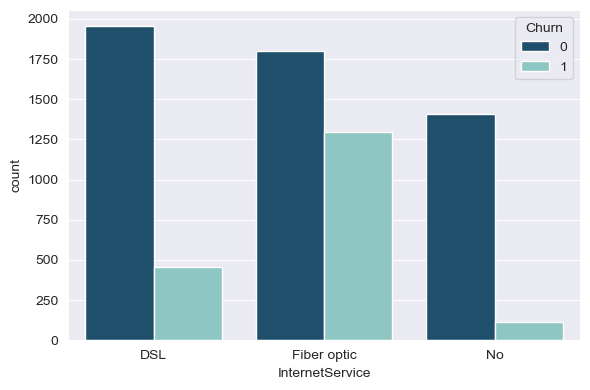

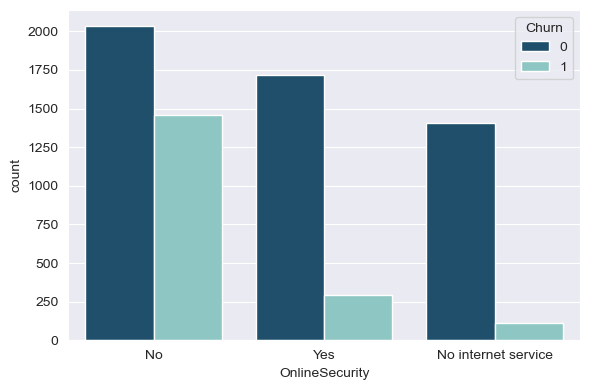

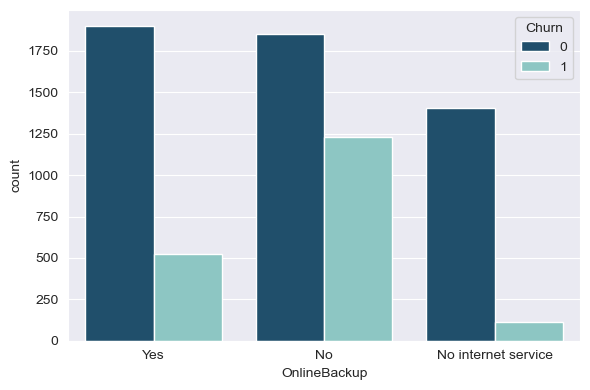

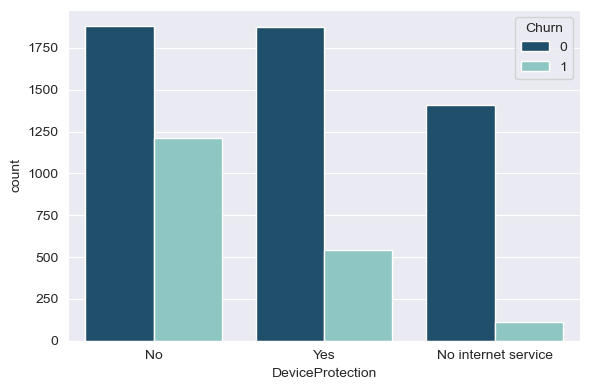

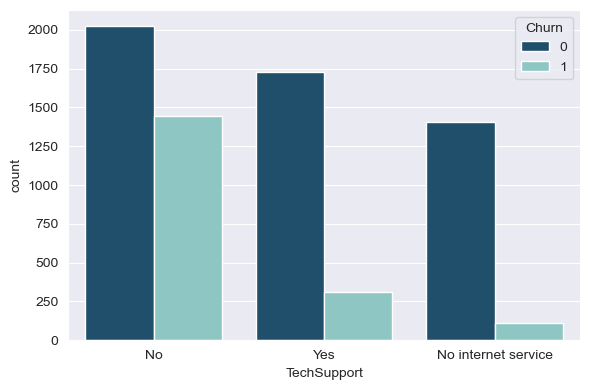

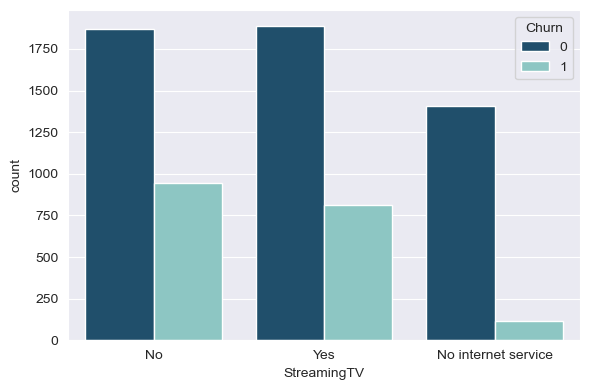

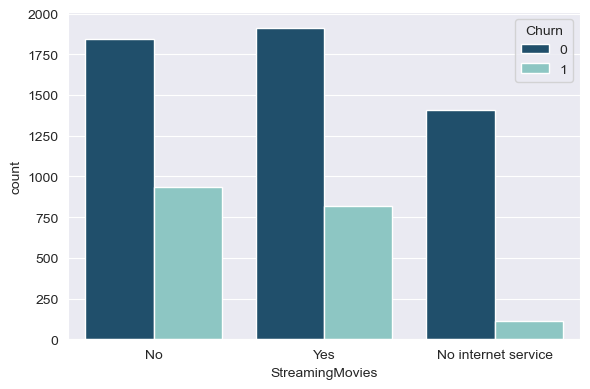

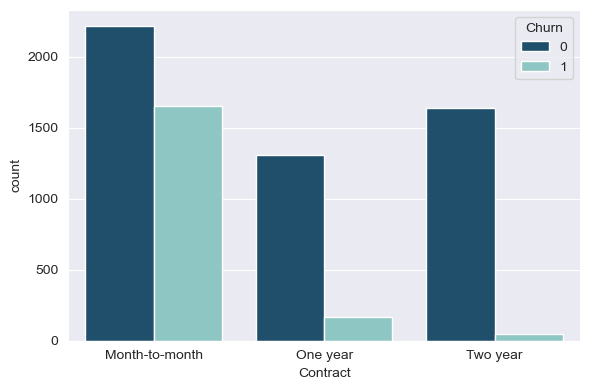

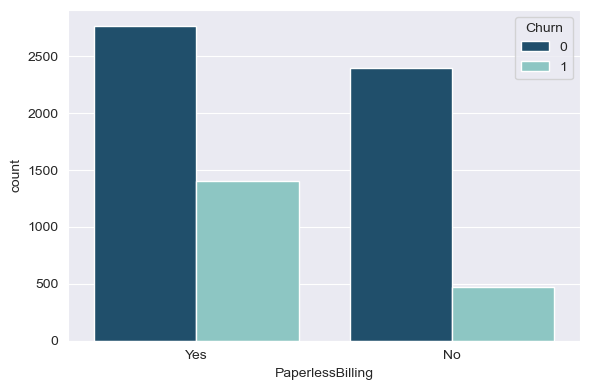

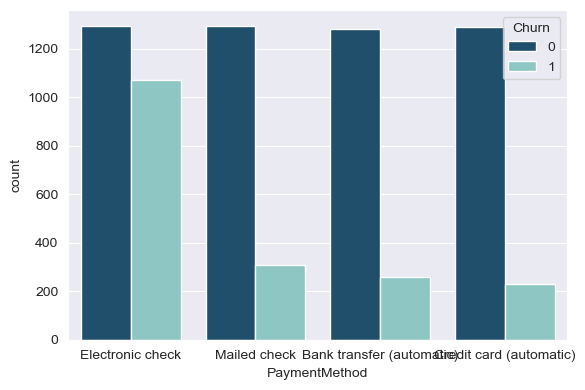

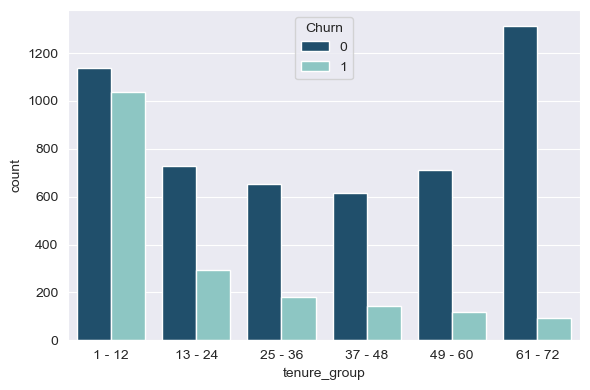

In [75]:
#Plotting the countplot of all important columns to gain insights
for i, predictor in enumerate(df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i,figsize=(6,4))
    sns.countplot(data=df,x=predictor,hue='Churn')
    plt.tight_layout()


1. **👩‍🦰👨‍🦱 Gender**: Gender doesn’t seem to have a big impact on churn, as the ratio is almost equal. But when combined with other factors, it could play a role.
2. **👴👵 Senior Citizen**: Senior citizens are more likely to churn, so they are at higher risk of leaving the service.
3. **💑 Partner**: Interestingly, customers with partners are more likely to churn.
4. **👶 Dependents**: Customers with dependents tend to stick around longer, so they’re less likely to churn.
5. **📞 Phone Service**: If a customer has phone service, they’re more likely to churn.
6. **📶 Multiple Lines**: This feature doesn’t seem to impact churn much.
7. **🌐 Internet Service**: Customers with fiber optic internet are more likely to churn, likely due to the high cost.
8. **🔐 Online Security**: Having online security reduces the likelihood of churn—customers with it are more likely to stay.
9. **💾 Online Backup**: Customers who use online backup services are less likely to leave.
10. **🖥️ Tech Support**: Customers with tech support are less likely to churn.
11. **📺 Streaming TV/Movies**: This doesn’t have much effect on churn since there’s no extra charge for these services.
12. **📅 Contract**: Customers with longer contracts (1 year or more) are much less likely to churn.
13. **📜 Paperless Billing**: This feature doesn’t have much impact on whether customers churn or not.
14. **💳 Payment Method**: Customers who pay by electronic check are more likely to churn, while those paying with credit cards are less likely to leave.
15. **⏳ Tenure Group**: Customers who have been with the company for less than a year are more likely to churn, while long-term customers are much more likely to stay.


Now lets convert the target variable Churn into a binary numeric value i.e Yes=1, No=0

In [77]:
df['Churn'].replace(["Yes","No"], [1,0],inplace=True)

Let's also convert all the categorical variables into dummy variables

In [78]:
#One Hot Encoding
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [76]:
100*df[df['SeniorCitizen']==1].shape[0]/df.shape[0]

16.24004550625711

There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

Now lets check out the pairplot

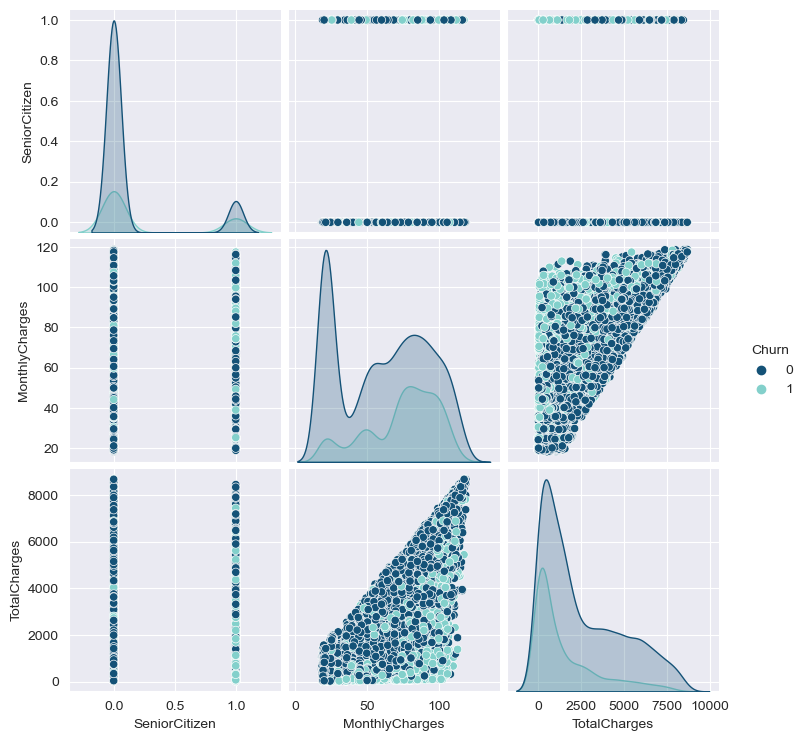

In [79]:
sns.pairplot(df,hue='Churn')

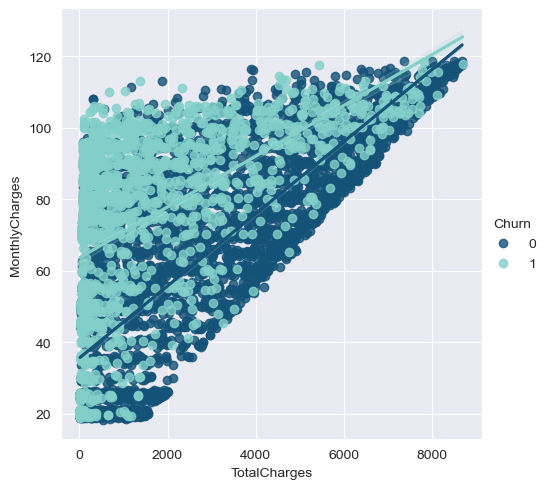

In [80]:
sns.lmplot(x='TotalCharges',y='MonthlyCharges',data=df,hue='Churn')

We can see that there is a relationship between MonthlyCharges and TotalCharges. TotalCharges Increases as Monthly Charges increases as expected. Now lets check out the kdeplot of MonthlyCharges and TotalCharges

C:\Users\COMPUTER WORLD\AppData\Local\Temp\ipykernel_5740\2120818580.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_dummies,x='MonthlyCharges',hue='Churn',shade=True)


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

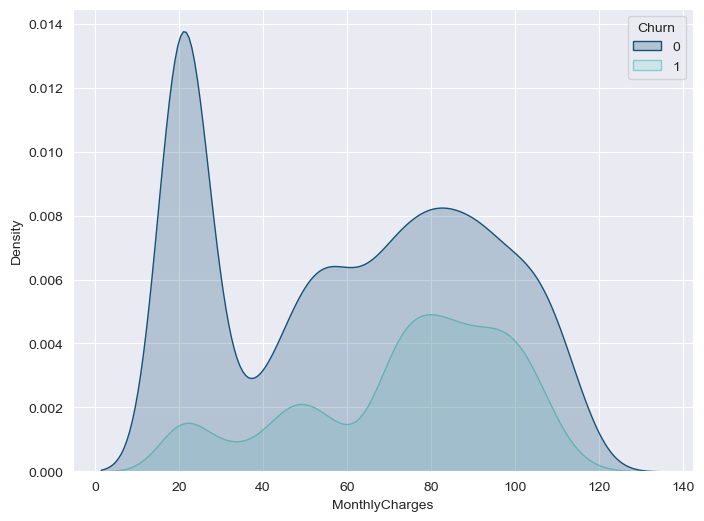

In [81]:
sns.kdeplot(data=df_dummies,x='MonthlyCharges',hue='Churn',shade=True)

C:\Users\COMPUTER WORLD\AppData\Local\Temp\ipykernel_5740\77734118.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_dummies,x='TotalCharges',hue='Churn',shade=True)


<Axes: xlabel='TotalCharges', ylabel='Density'>

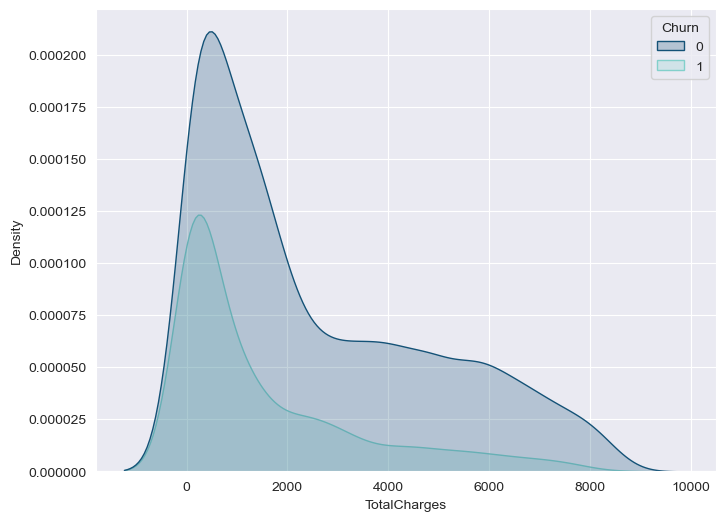

In [82]:
sns.kdeplot(data=df_dummies,x='TotalCharges',hue='Churn',shade=True)

We find that the Customers are more likely to churn for lower monthly and total charges...Why is that?


C:\Users\COMPUTER WORLD\AppData\Local\Temp\ipykernel_5740\3869418282.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_dummies,x='MonthlyCharges',hue='tenure_group_1 - 12',shade=True)


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

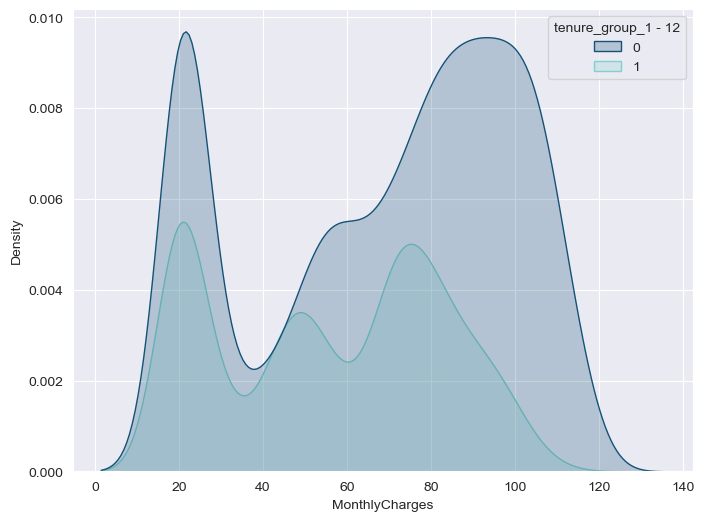

In [83]:
sns.kdeplot(data=df_dummies,x='MonthlyCharges',hue='tenure_group_1 - 12',shade=True)

C:\Users\COMPUTER WORLD\AppData\Local\Temp\ipykernel_5740\1782551358.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_dummies,x='TotalCharges',hue='tenure_group_1 - 12',shade=True)


<Axes: xlabel='TotalCharges', ylabel='Density'>

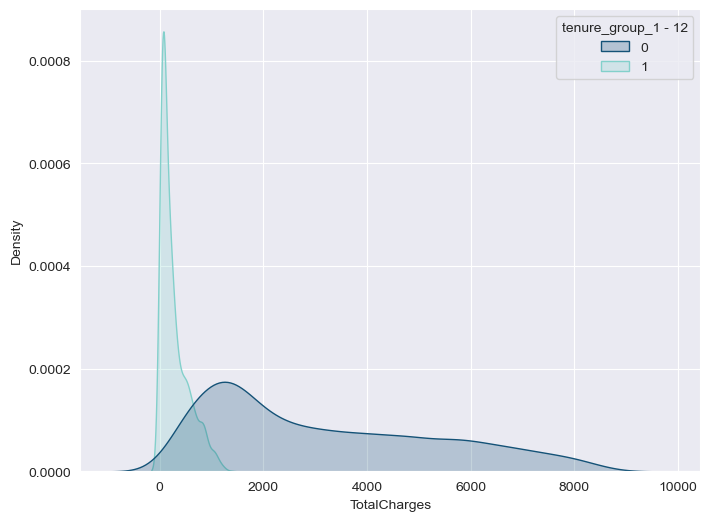

In [84]:
sns.kdeplot(data=df_dummies,x='TotalCharges',hue='tenure_group_1 - 12',shade=True)

We can see that people having a shorter tenure are the ones who are likely to churn and their Total charges will always be less due to their short tenures. Similarly, Low Monthly Charges users tend to churn becase they maybe trying the service and will churn if they find some other service
***

Lets see if the internet service plays a role in churning or not

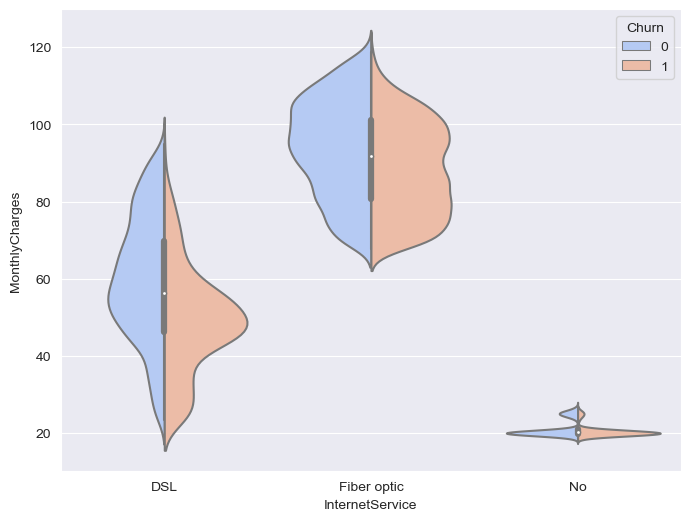

In [85]:
sns.violinplot(x="InternetService", y="MonthlyCharges", hue="Churn",split=True, 
               palette="coolwarm", data=df, height=4.5, aspect=1.5);

Customers with fiber optic (fast connection) are more probable to churn than those with DSL connection (slower connection) as their service.<br>
Also we can also observe that customers with DSL with higher charges are less probable to churn but the ones with lesser charges (~ 40-60 USD) are more likely to churn 
***

Now Lets check the additional services offered by the company

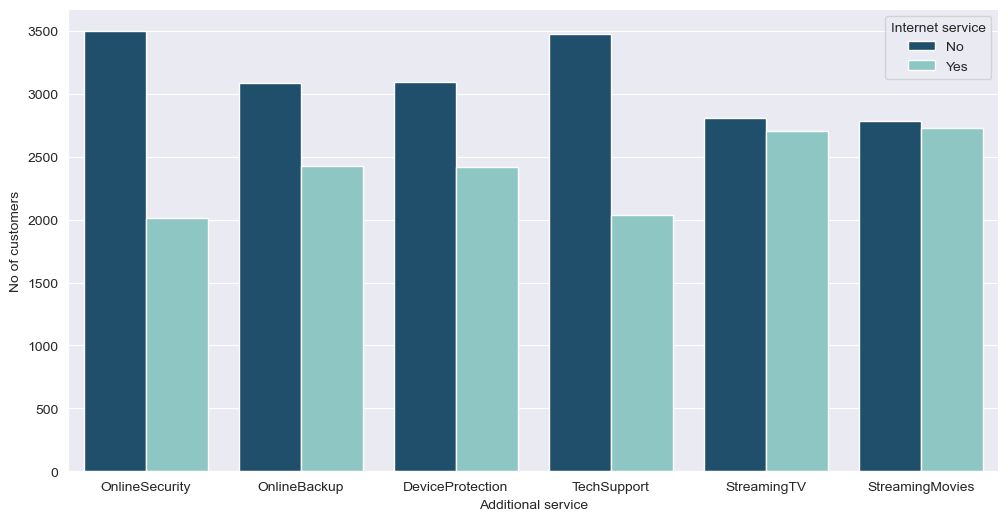

In [86]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df_service = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Internet service'}, axis=1)
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_service, x='variable', hue='Internet service')
ax.set(xlabel='Additional service', ylabel='No of customers')
plt.show()

Lets check the correlations of Churn with other features

Text(0.5, 1.0, 'Positive Correlation')

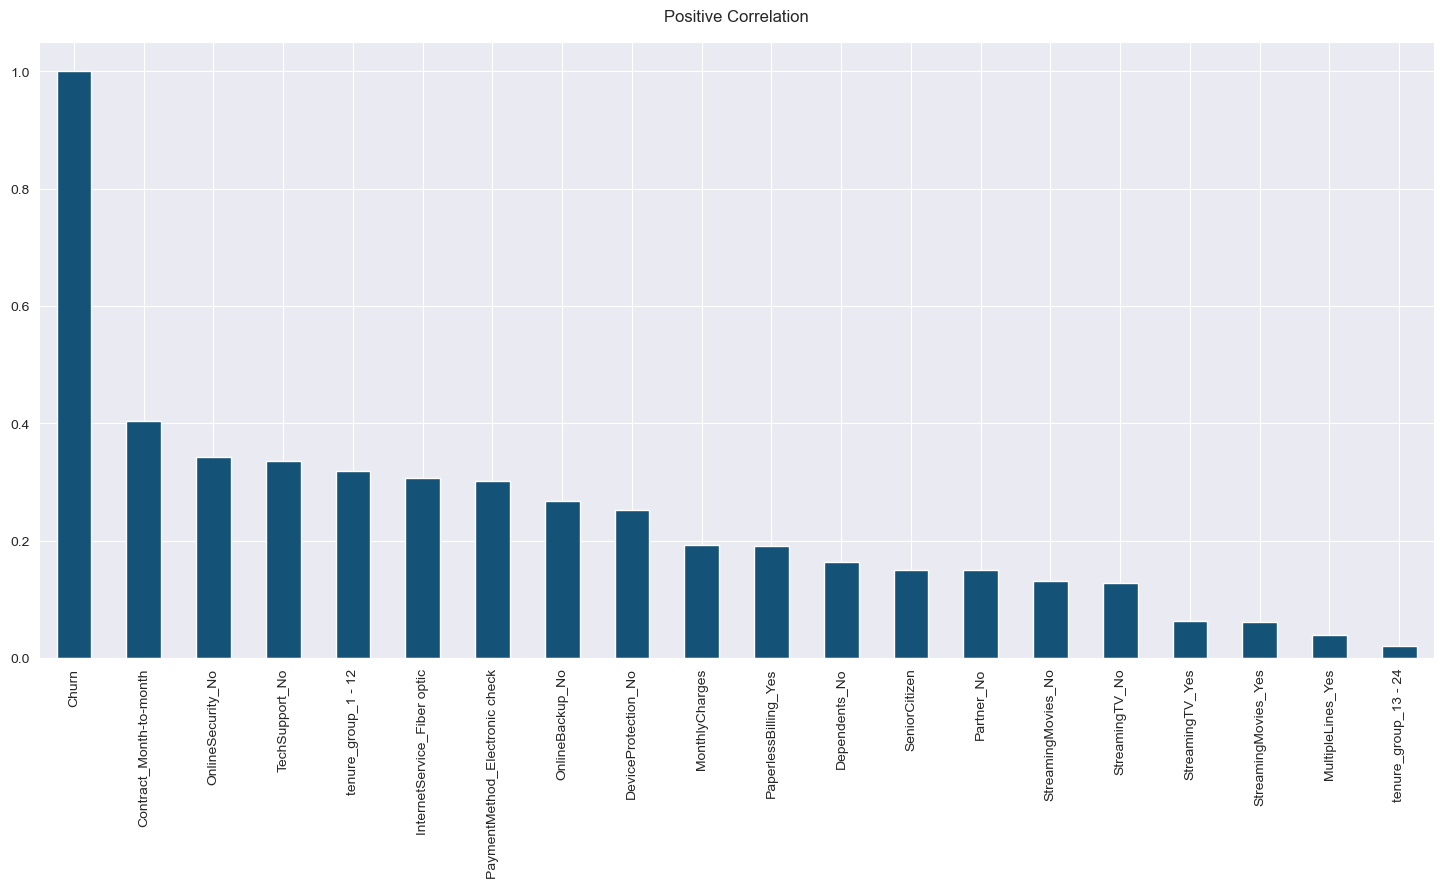

In [87]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(18,8))
df_dummies.corr()['Churn'].sort_values(ascending = False)[:20].plot(kind='bar')
plt.title('Positive Correlation')

Text(0.5, 1.0, 'Negative Correlation')

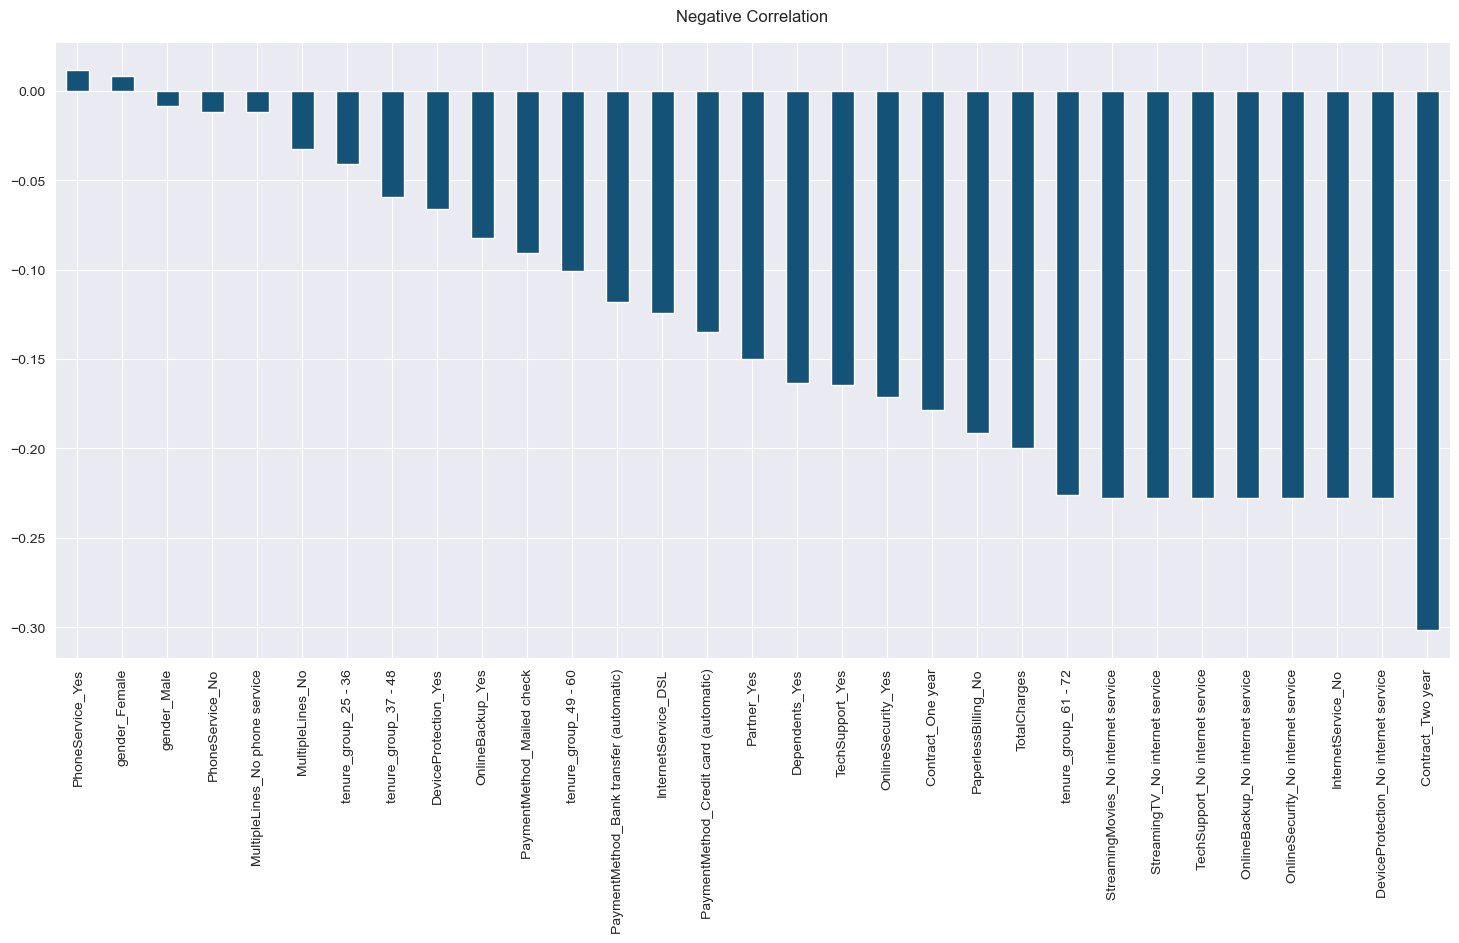

In [88]:
plt.figure(figsize=(18,8))
df_dummies.corr()['Churn'].sort_values(ascending = False)[20:].plot(kind='bar')
plt.title('Negative Correlation')

<Axes: >

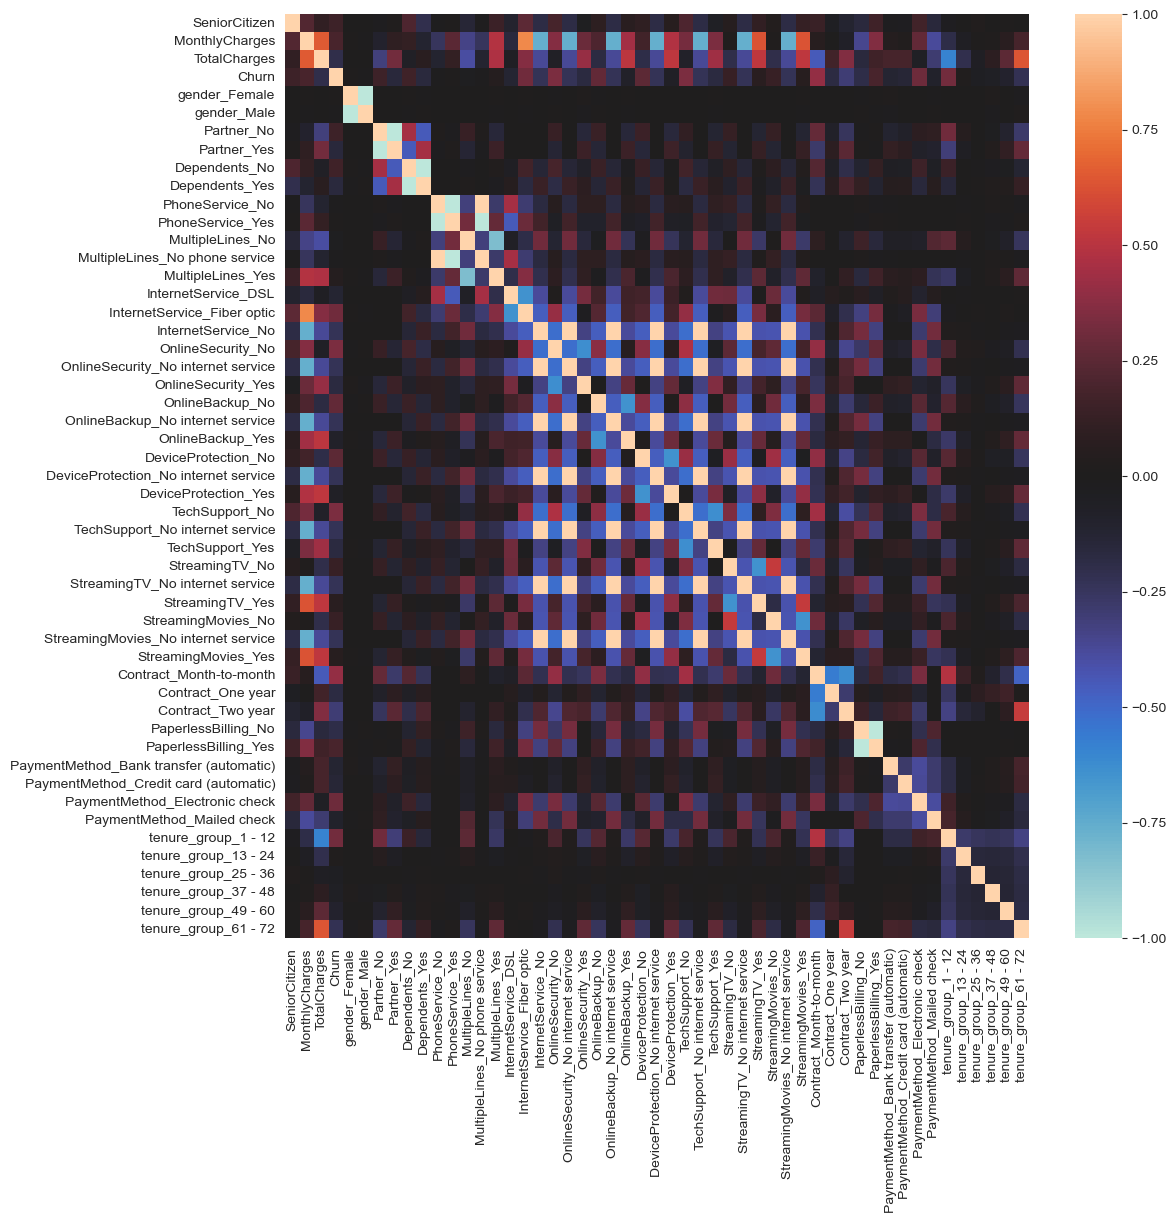

In [89]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(),cmap='icefire')

#### Insights:
From these correlation diagrams we can observe the following things:


1. **High Churn**: Seen in cases of *Month-to-Month Contacts, No Online Security, No Tech Support, First Year of Subscription and Fibre Optics Internet service*

2. **Low Churn**: Seen in cases of *Long term Contacts, Subscriptions without Internet Service, and tenure of 5+ years*

3. **Little to no Impact** : Some cases like *Mutiple Lines, Availability of Phone service and Gender* have little to no impact on Churn on their own

### Bivariate Analysis

To do this lets seperate our database intro two categories- Churners and Non-Churners

In [90]:
churners_df = df.loc[df_dummies['Churn']==1]
non_churners_df = df.loc[df_dummies['Churn']==0]
churners_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,1 - 12
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,25 - 36
13,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,49 - 60


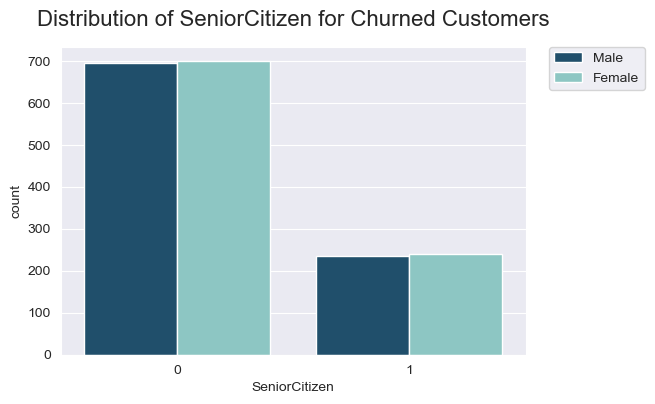

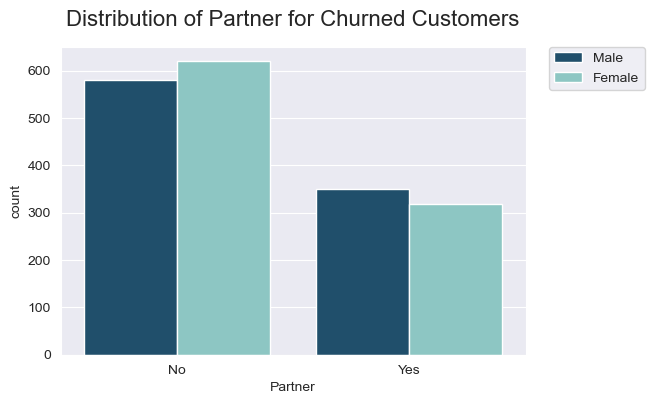

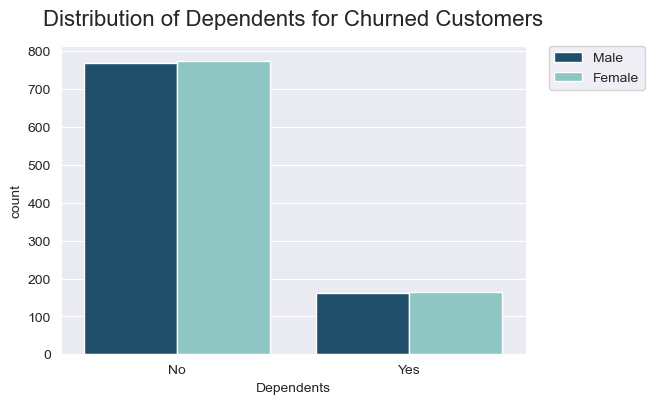

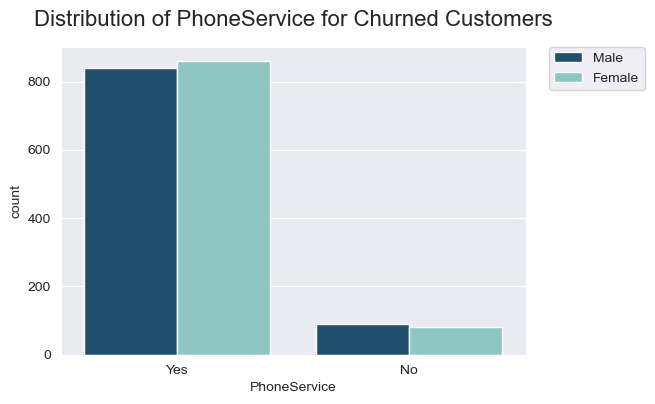

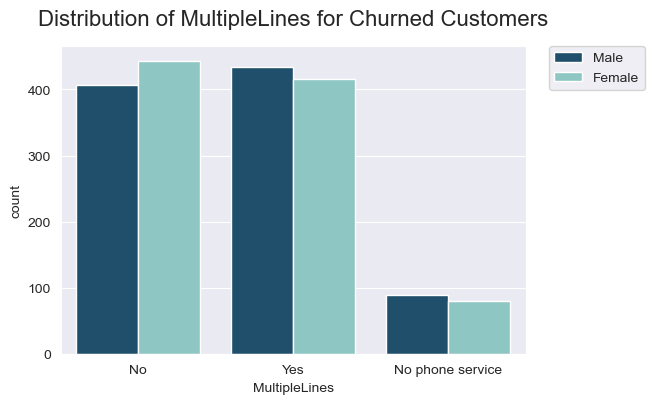

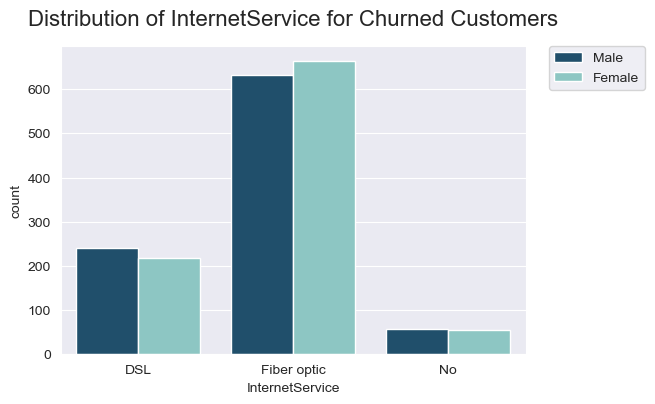

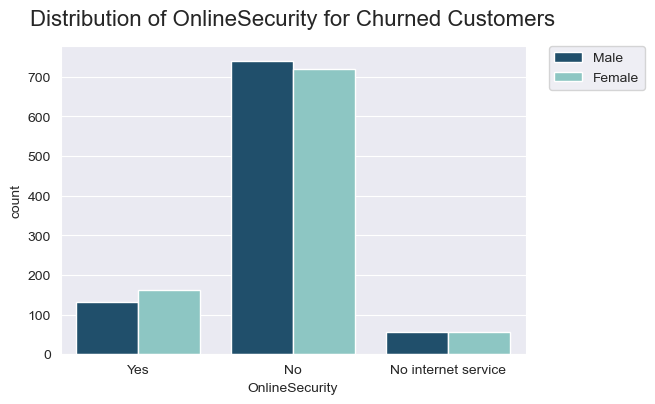

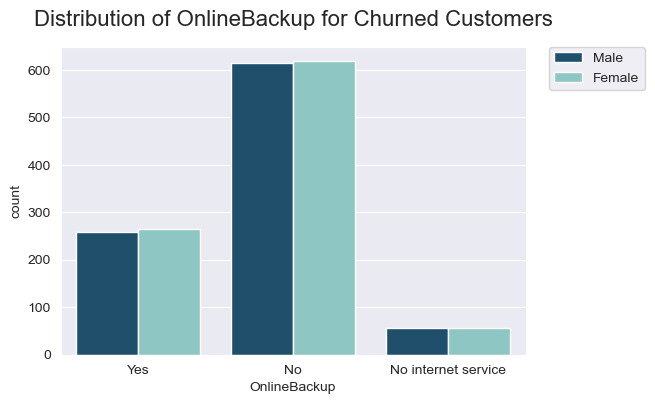

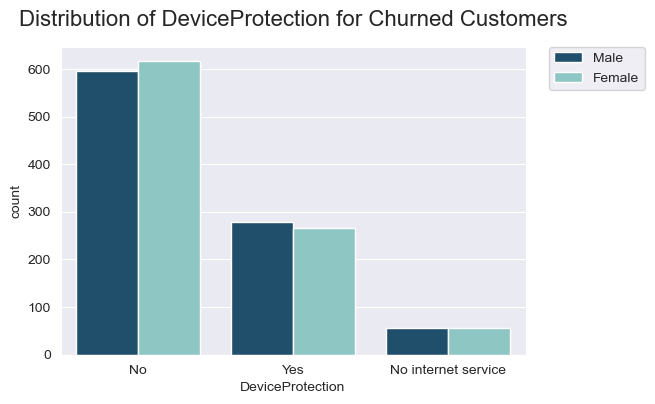

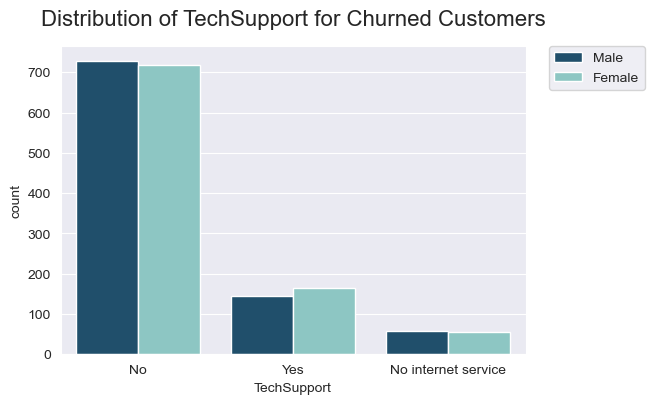

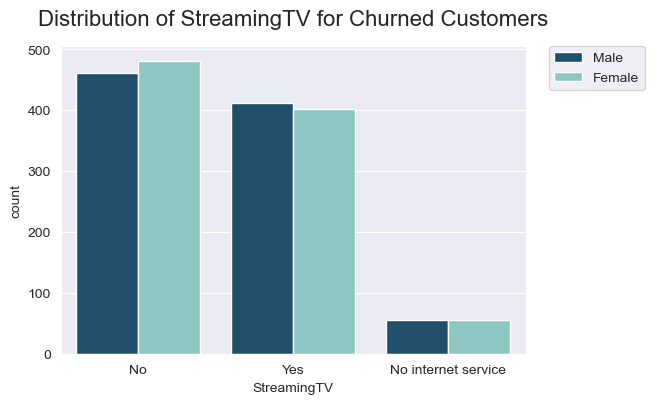

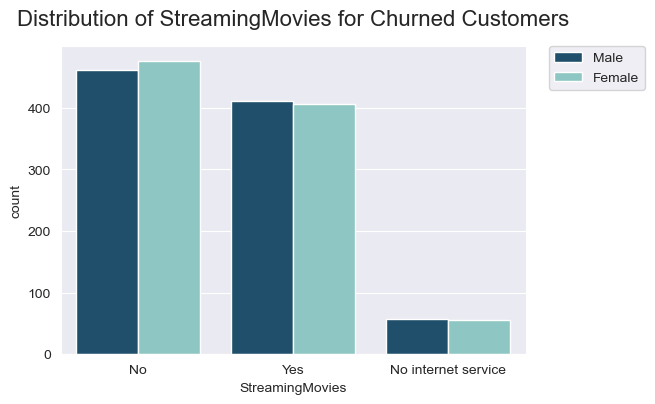

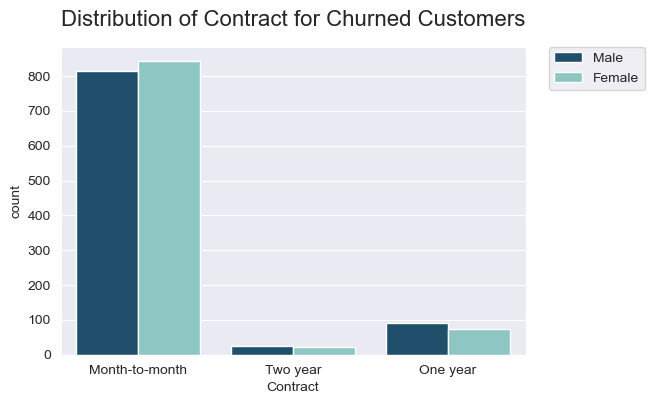

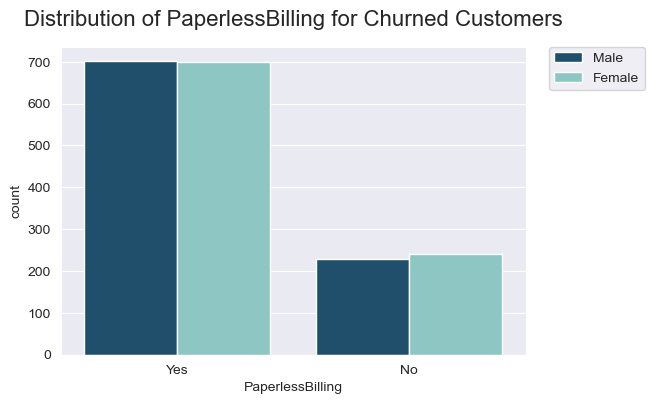

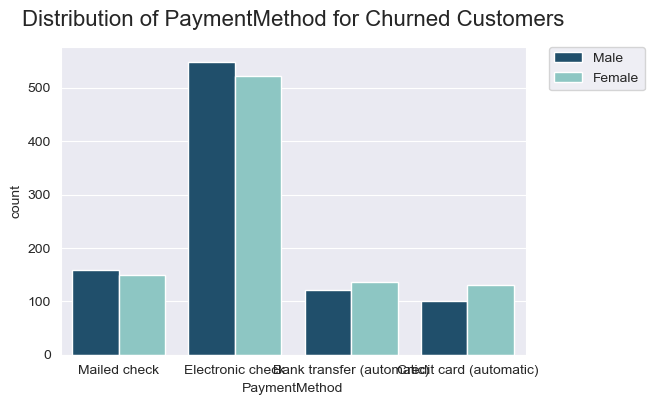

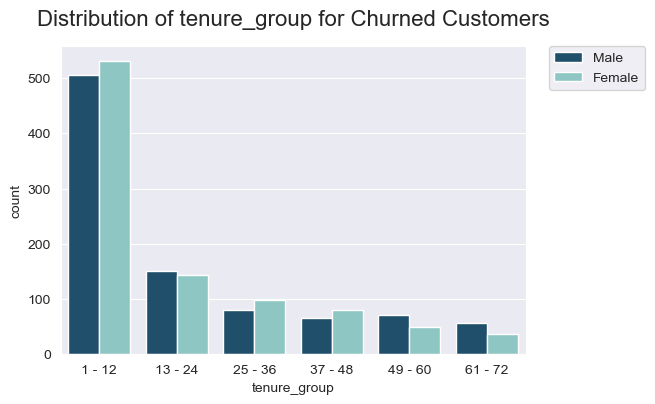

In [91]:
#Plotting the countplot of all important columns to gain insights


for i, predictor in enumerate(churners_df.drop(columns=['Churn','TotalCharges','MonthlyCharges','gender'])):
    plt.figure(i,figsize=(6,4))  
    plt.title("Distribution of {} for Churned Customers".format(predictor),fontsize='16')
    sns.countplot(data=churners_df,x=predictor,hue='gender')
    plt.tight_layout
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Observations

1. Gender doesnt seem to have that much of an effect on Churning in customers.
2. Few insights we can gain from this is that female customers are a little more likely to churn than male customers if their tenure is less than a year, but are less likely to churn than male customers for long tenures.
3. Female customers are more likely to churn than male customer if their payment method is Credit Card.


## Conclusion from EDA:

1. **📅 Short-Term Contracts**: Customers with short-term contracts (like month-to-month) tend to churn at a higher rate. This is likely because they don’t feel tied to the service and can easily leave without long-term commitment.
   
2. **🔄 Month-to-Month Contracts**: Although more customers opt for month-to-month contracts, they increase the likelihood of churn significantly (by **6.31x**). The flexibility to cancel at any time leads to higher churn risk.

3. **📆 Two-Year Contracts**: Customers who sign two-year contracts have a much lower churn rate. The longer commitment helps retain customers, as they are less likely to cancel in the middle of their contract.

4. **⏳ Tenure**: Customers who have been with the company for a longer period (more than a year) are much less likely to churn. The longer a customer stays, the more likely they are to remain loyal.

5. **💳 Payment Methods**: Customers who pay using electronic checks have a higher churn rate, possibly due to payment delays or dissatisfaction with payment options. On the other hand, customers who pay via credit cards tend to churn less, suggesting that those with more convenient payment options stay longer.

6. **🌐 Internet Service**: Customers without internet service generally have a very low churn rate. This might be because they typically use basic services and don’t have the option to cancel easily.

7. **🌐 Fiber Optic Internet**: Customers who use fiber optic internet services are more likely to churn. This could be due to the higher costs associated with fiber optic services, which may lead customers to seek more affordable alternatives.

8. **👴 Senior Citizens**: Senior citizens are more likely to churn. This could be because they may have different needs or expectations, and could be more price-sensitive or less interested in long-term services.

9. **🔒 Additional Features**: Customers who use additional services like online security, backup, device protection, and tech support are less likely to churn. These services add value to the customer experience, making them feel more supported and less likely to leave.



## C) Training the Model to Predict Churning

Now lets train the model to predict Churning. We will keep tenure in months as the tenure_group column was made for visualization and our models input will be in tenure

Following are the list of algorithms that are used in this notebook.

| Algorithms |
| ----------- |
| Logistic Regression   | 
| Decision Tree  | 
| Random Forest   | 
| PCA     | 
| SVM|
| AdaBoost  | 

In [7]:
data = pd.read_csv('D:\\!DOWNLOAD\\Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
replaceStruct = {"Churn":     {"No": 0, "Yes": 1 }  }
oneHotCols = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines"
            ,"InternetService","OnlineSecurity","OnlineBackup",
            "DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
            "Contract","PaperlessBilling","PaymentMethod"]

df2=data.replace(replaceStruct, inplace=True)
df2=pd.get_dummies(data, columns=oneHotCols)
pd.set_option('display.max_columns',100)
df2.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.5,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [9]:
df2['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce') #coerce puts NaN values if there are any parsing errors
df2.dropna(inplace=True)
df2=df2.drop('customerID',axis=1)
df2.to_csv(r'Telco-Customer-Predictions.csv')

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   uint8  
 5   gender_Male                              7032 non-null   uint8  
 6   SeniorCitizen_0                          7032 non-null   uint8  
 7   SeniorCitizen_1                          7032 non-null   uint8  
 8   Partner_No                               7032 non-null   uint8  
 9   Partner_Yes                              7032 non-null   uint8  
 10  Dependents_No                            7032 no

In [11]:
df_dummies= pd.get_dummies(df2)
df_dummies

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7362.90,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,346.45,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,306.60,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [12]:
X = df_dummies.drop('Churn',axis=1)
y = df_dummies['Churn']

### a) Decision Tree Classifier


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_leaf=8)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8)

In [36]:
y_pred = dt_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
dt = round(accuracy_score(y_test, y_pred)*100, 2)
dt

77.11

In [38]:
def print_report(model, X_test, y_test, y_pred):
    """
    Prints model score, confusion matrix as a heatmap, 
    and a classification report as a nice-looking table.
    """
    # Model score
    print("Model Score: {:.2f}\n".format(model.score(X_test, y_test)))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n")
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Accuracy
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    print("Accuracy: {}%\n".format(accuracy))
    
    # Classification Report
    print("Classification Report:\n")
    class_report = classification_report(y_test, y_pred, labels=[0, 1], target_names=['No Churn', 'Churn'], output_dict=True)
    df_report = pd.DataFrame(class_report).transpose()
    df_report = df_report.round(2)
    print(df_report)


Model Score: 0.77

Confusion Matrix:



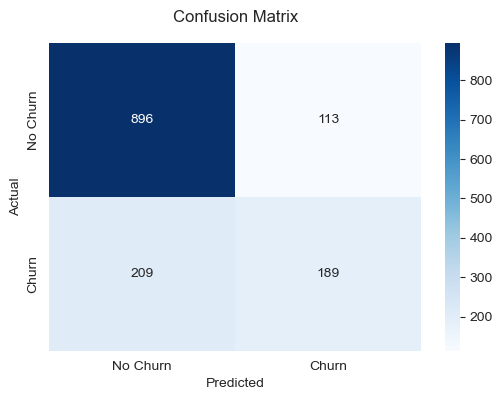

Accuracy: 77.11%

Classification Report:

              precision  recall  f1-score  support
No Churn           0.81    0.89      0.85  1009.00
Churn              0.63    0.47      0.54   398.00
accuracy           0.77    0.77      0.77     0.77
macro avg          0.72    0.68      0.69  1407.00
weighted avg       0.76    0.77      0.76  1407.00


In [39]:
print_report(dt_model,X_test,y_test,y_pred)

We can see that although f1-score for non churners is high but for our minority class, Churn=1 the f1-score is very low (0.58). Thus the model is not properly created.Why you may ask? Well its because our dataset is an imbalanced set as we previously saw and the number of churned customers is way lesser than that of non churners.

"***The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important***"<br>ref : machinelearningmastery.com

A technique for addressing imbalanced datasets is to oversample the minority class so that new examples can be synthesized from the existing samples.

We will be using 'SMOTEENN' (Combination Synthetic minority over-sampling technique (SMOTE) and cleaning with Edited nearest neighbor (ENN)) to oversample our minority class. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

In [40]:
print("Before OverSampling- counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling- counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)

print("After OverSampling with SMOTEENN - '1': {}".format(sum(y_resampled==1)))
print("After OverSampling with SMOTEENN - '0': {}".format(sum(y_resampled==0)))

Before OverSampling- counts of label '1': 1471
Before OverSampling- counts of label '0': 4154 

After OverSampling with SMOTEENN - '1': 2859
After OverSampling with SMOTEENN - '0': 2162


As you can see after over sampling and cleaning with SMOTEENN, the distribution of churners and non-churners is now almost evenly distributed

Model Score: 0.94

Confusion Matrix:



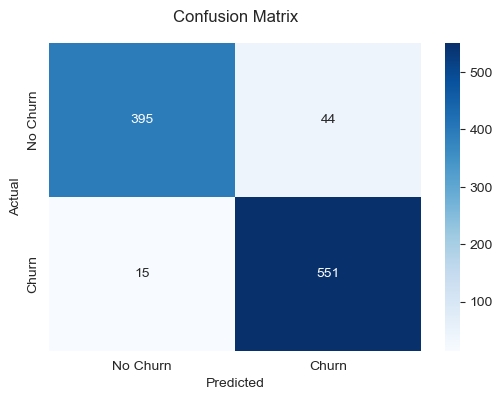

Accuracy: 94.13%

Classification Report:

              precision  recall  f1-score  support
No Churn           0.96    0.90      0.93   439.00
Churn              0.93    0.97      0.95   566.00
accuracy           0.94    0.94      0.94     0.94
macro avg          0.94    0.94      0.94  1005.00
weighted avg       0.94    0.94      0.94  1005.00


In [41]:
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resampled, y_resampled,test_size=0.2)
model_dt_smote=DecisionTreeClassifier(criterion = "gini",max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(X_resampled,y_resampled)

yr_pred = model_dt_smote.predict(Xr_test)

print_report(model_dt_smote,Xr_test,yr_test,yr_pred)
dt_smote = round(accuracy_score(yr_test, yr_pred)*100, 2)

As we can see that the performance of the model has increased significantly after performing oversampling.

Now lets try some more models and choose one of the models with the best performance.

### b) Logistic regression


Model Score: 0.78

Confusion Matrix:



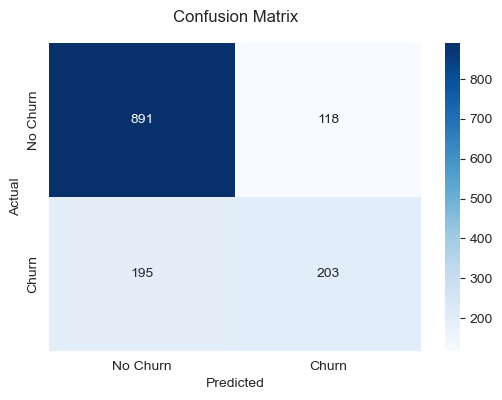

Accuracy: 77.75%

Classification Report:

              precision  recall  f1-score  support
No Churn           0.82    0.88      0.85  1009.00
Churn              0.63    0.51      0.56   398.00
accuracy           0.78    0.78      0.78     0.78
macro avg          0.73    0.70      0.71  1407.00
weighted avg       0.77    0.78      0.77  1407.00


In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# Using MinMaxScaler to scale the variables in logistic regression so that all of them are within a range of 0 to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features


#Model fitting
model_lr = LogisticRegression(solver='lbfgs',max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
print_report(model_lr,X_test,y_test,y_pred)
lr = round(accuracy_score(y_test, y_pred)*100, 2)

Model Score: 0.90

Confusion Matrix:



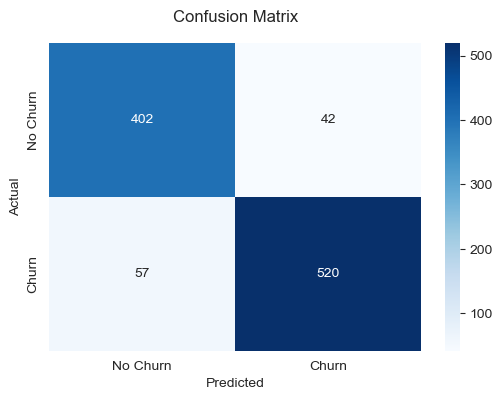

Accuracy: 90.3%

Classification Report:

              precision  recall  f1-score  support
No Churn           0.88    0.91      0.89    444.0
Churn              0.93    0.90      0.91    577.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.90    0.90      0.90   1021.0
weighted avg       0.90    0.90      0.90   1021.0


In [43]:
sm = SMOTEENN()

X_resample, y_resample = sm.fit_resample(X_train,y_train)
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resample, y_resample,test_size=0.2)

model_lr_smote = LogisticRegression(solver='lbfgs',max_iter=1000)
model_lr_smote.fit(Xr_train,yr_train)

yr_pred = model_lr_smote.predict(Xr_test)
print_report(model_lr_smote,Xr_test,yr_test,yr_pred)
lr_smote = round(accuracy_score(yr_test, yr_pred)*100, 2)

The above two plots show us the positively and negatively correlated values other than tenure and Total charges with being the most negatively correlated feature and monthlazy contract is the most positively correlated feature w.r.t Churn

### c) Random Forest

Model Score: 0.78

Confusion Matrix:



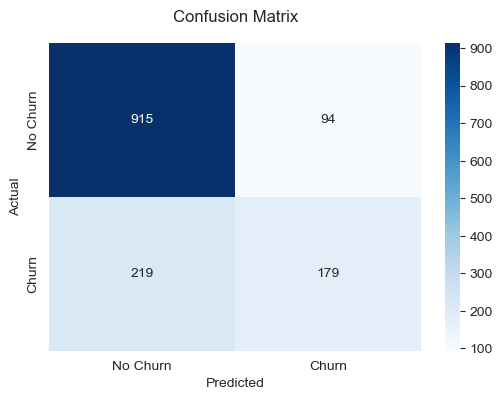

Accuracy: 77.75%

Classification Report:

              precision  recall  f1-score  support
No Churn           0.81    0.91      0.85  1009.00
Churn              0.66    0.45      0.53   398.00
accuracy           0.78    0.78      0.78     0.78
macro avg          0.73    0.68      0.69  1407.00
weighted avg       0.76    0.78      0.76  1407.00


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
print_report(model_rf,X_test,y_test,y_pred)
rf = round(accuracy_score(y_test, y_pred)*100, 2)

Model Score: 0.93

Confusion Matrix:



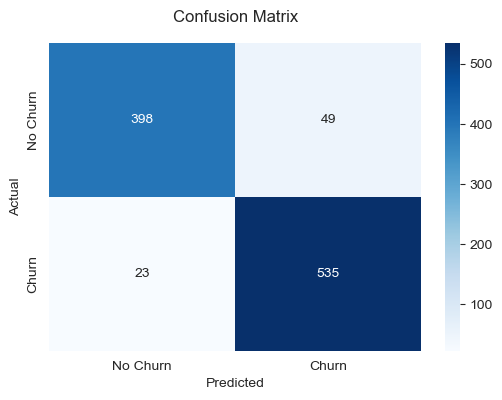

Accuracy: 92.84%

Classification Report:

              precision  recall  f1-score  support
No Churn           0.95    0.89      0.92   447.00
Churn              0.92    0.96      0.94   558.00
accuracy           0.93    0.93      0.93     0.93
macro avg          0.93    0.92      0.93  1005.00
weighted avg       0.93    0.93      0.93  1005.00


In [45]:
sm = SMOTEENN()
X_resampled2, y_resampled2 = sm.fit_resample(X_train,y_train)

Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

model_rf_smote.fit(Xr_train,yr_train)
yr_pred = model_rf_smote.predict(Xr_test)

print_report(model_rf_smote,Xr_test,yr_test,yr_pred)
rf_smote = round(accuracy_score(yr_test, yr_pred)*100, 2)

In [46]:
Xr_train

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1714,0.633803,0.199005,0.200387,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.0,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,1.000000
1845,0.563380,0.809950,0.484832,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,0.000000
4637,0.029524,0.776991,0.033001,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.548089,0.0,0.451911,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.451911,0.0,0.548089,0.451911,0.0,0.548089,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.000000
5,0.929577,0.017910,0.143578,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.000000
219,0.154930,0.314428,0.061539,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.605634,0.358706,0.273673,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.000000,1.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.000000,1.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.000000,0.000000
2845,0.000000,0.272637,0.003098,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.000000,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.0,0.000000,1.000000,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.000000
4262,0.004575,0.089994,0.002789,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,1.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.675141,0.0,0.324859,1.000000,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.324859,0.675141
1241,0.197183,0.017910,0.030637,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000


In [47]:
yr_pred= model_rf_smote.predict(Xr_test)
yr_pred[0:5]

array([1, 1, 0, 1, 0], dtype=int64)

In [48]:
yr_pred = model_rf_smote.predict_proba(Xr_test)
yr_pred[0:5]

array([[0.11724204, 0.88275796],
       [0.08232211, 0.91767789],
       [0.97515308, 0.02484692],
       [0.02746925, 0.97253075],
       [0.99300673, 0.00699327]])

predict_proba gives is the confidence score of that particular label while predict outputs binary probability

### d) PCA

Model Score: 0.76

Confusion Matrix:



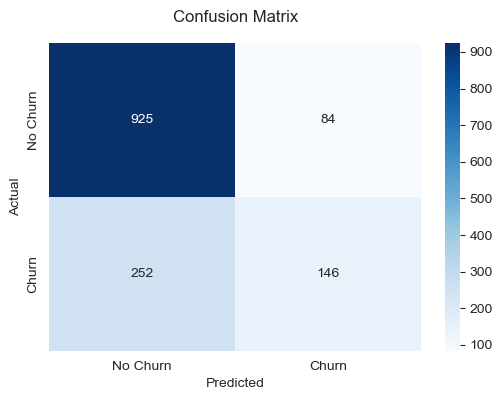

Accuracy: 76.12%

Classification Report:

              precision  recall  f1-score  support
No Churn           0.79    0.92      0.85  1009.00
Churn              0.63    0.37      0.46   398.00
accuracy           0.76    0.76      0.76     0.76
macro avg          0.71    0.64      0.66  1407.00
weighted avg       0.74    0.76      0.74  1407.00


In [49]:
# Applying PCA
from sklearn.decomposition import PCA
pcas = PCA(0.9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

X_train_pca = pcas.fit_transform(X_train)
X_test_pca = pcas.transform(X_test)
model_pca=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100, max_depth=6, min_samples_leaf=8)
model_pca.fit(X_train_pca,y_train)

y_pred_pca = model_pca.predict(X_test_pca)

print_report(model_pca,X_test_pca,y_test,y_pred_pca)
pca = round(accuracy_score(y_test, y_pred_pca)*100, 2)

Model Score: 0.91

Confusion Matrix:



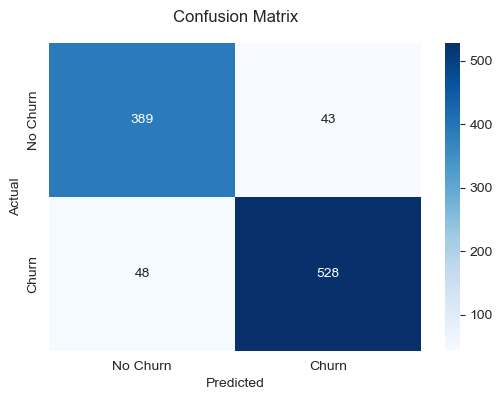

Accuracy: 90.97%

Classification Report:

              precision  recall  f1-score  support
No Churn           0.89    0.90      0.90   432.00
Churn              0.92    0.92      0.92   576.00
accuracy           0.91    0.91      0.91     0.91
macro avg          0.91    0.91      0.91  1008.00
weighted avg       0.91    0.91      0.91  1008.00


In [50]:
sm = SMOTEENN()
X_resample, y_resample = sm.fit_resample(X_train,y_train)
Xr_train, Xr_test, yr_train, yr_test=train_test_split(X_resample, y_resample,test_size=0.2)
pcas = PCA(0.9)

Xr_train_pca = pcas.fit_transform(Xr_train)
Xr_test_pca = pcas.transform(Xr_test)
model_pca_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100, max_depth=6, min_samples_leaf=8)
model_pca_smote.fit(Xr_train_pca,yr_train)

yr_pred_pca = model_pca_smote.predict(Xr_test_pca)

print_report(model_pca_smote,Xr_test_pca,yr_test,yr_pred_pca)
pca_smote = round(accuracy_score(yr_test, yr_pred_pca)*100, 2)

### e) Support Vector Machines (SVM)

Model Score: 0.78

Confusion Matrix:



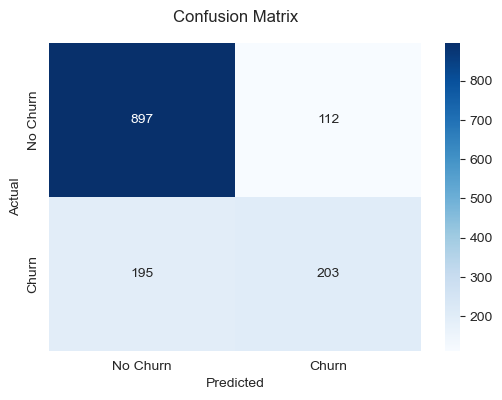

Accuracy: 78.18%

Classification Report:

              precision  recall  f1-score  support
No Churn           0.82    0.89      0.85  1009.00
Churn              0.64    0.51      0.57   398.00
accuracy           0.78    0.78      0.78     0.78
macro avg          0.73    0.70      0.71  1407.00
weighted avg       0.77    0.78      0.77  1407.00


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
from sklearn.svm import SVC

model_svm = SVC(kernel='linear') 
model_svm.fit(X_train,y_train)
y_pred = model_svm.predict(X_test)

print_report(model_svm, X_test, y_test, y_pred)
svm = round(accuracy_score(y_test, y_pred)*100, 2)

Model Score: 0.91

Confusion Matrix:



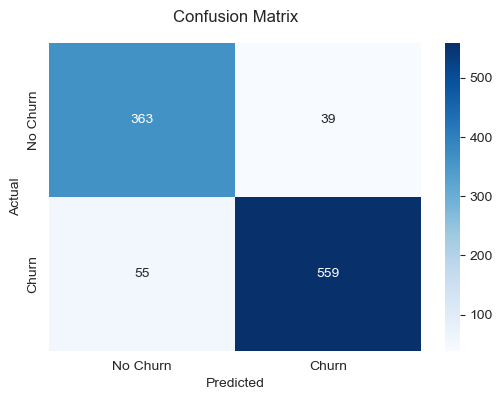

Accuracy: 90.75%

Classification Report:

              precision  recall  f1-score  support
No Churn           0.87    0.90      0.89   402.00
Churn              0.93    0.91      0.92   614.00
accuracy           0.91    0.91      0.91     0.91
macro avg          0.90    0.91      0.90  1016.00
weighted avg       0.91    0.91      0.91  1016.00


In [52]:
sm = SMOTEENN()
X_resample, y_resample = sm.fit_resample(X_train,y_train)
Xr_train,Xr_test,yr_train,yr_test = train_test_split(X_resample, y_resample,test_size=0.2)

model_svm_smote = SVC(kernel='linear')
model_svm_smote.fit(Xr_train, yr_train)
yr_pred = model_svm_smote.predict(Xr_test)

print_report(model_svm_smote,Xr_test,yr_test,yr_pred)
svm_smote = round(accuracy_score(yr_test, yr_pred)*100, 2)

,Model,Accuracy_score,Smote_Accuracy_score
0,Decision trees,77.11,94.13
1,Random Forest,77.75,92.84
2,PCA,76.12,90.97
3,SVM,78.18,90.75
4,Logistic Regression,77.75,90.30


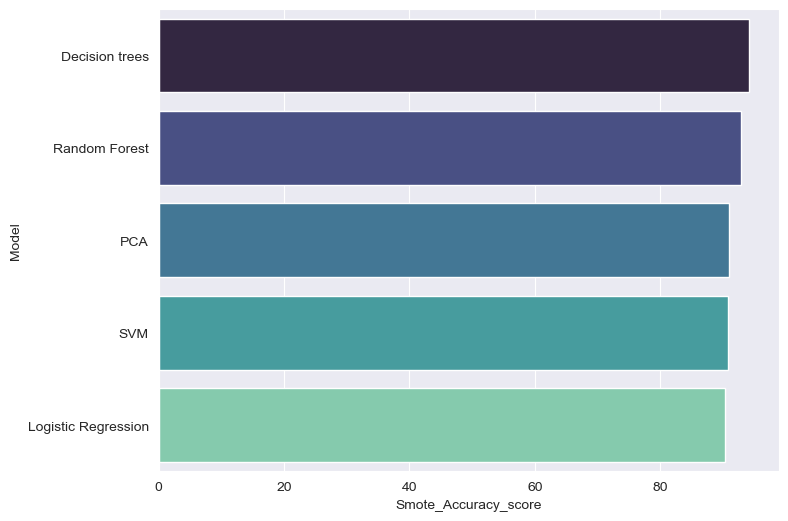

In [53]:
models = pd.DataFrame({
    'Model':['Decision trees', 'Logistic Regression', 'Random Forest', 'PCA', 'SVM'],
    'Accuracy_score' : [dt, lr, rf, pca, svm],
    'Smote_Accuracy_score' : [dt_smote, lr_smote, rf_smote, pca_smote, svm_smote]
})
sns.barplot(x='Smote_Accuracy_score', y='Model', palette='mako',data=models.sort_values(by='Smote_Accuracy_score',
                                                                         ascending=False, ignore_index=True))

models.sort_values(by='Smote_Accuracy_score', ascending=False, ignore_index=True)

All the models are giving very good performance and their accuracy seems to be very close to each other. After applying SMOTE ENN the models performance jumps up significantly. Decision trees are giving us one of the top model performances. Hence we will be going to use Random Forests as our model for predicting Customer Churn. Lets create a pickle now and store our model in it.